In [6]:
# load Nifti Image
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import zoom
from scipy import ndimage
from glob import glob

def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices), figsize=(10, 10))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice, cmap="gray", origin="lower")

srcpath = 'E:/20200603_Asan_meningioma_raw_nifti_preprocessed/High_grade/Resampled'

C:\Users\dain5\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


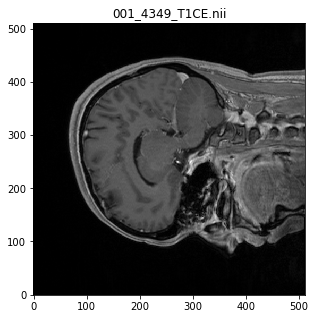

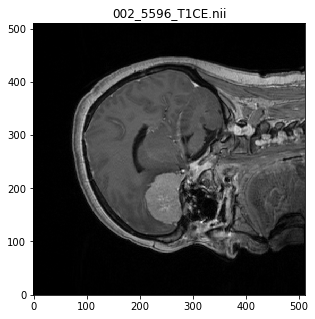

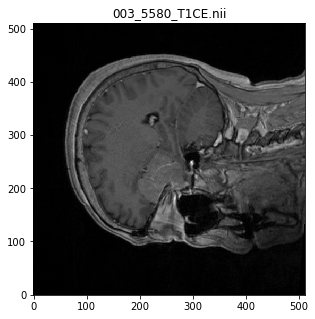

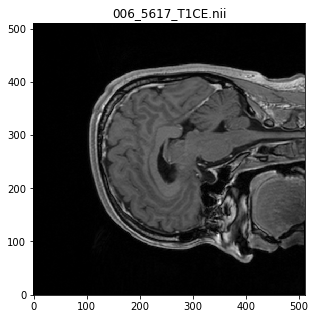

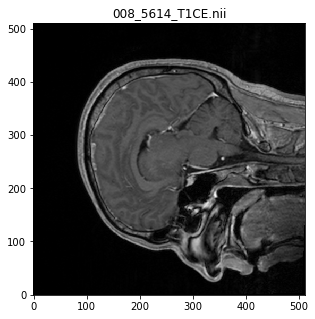

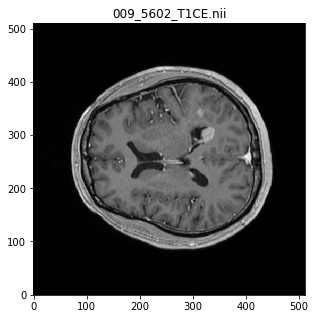

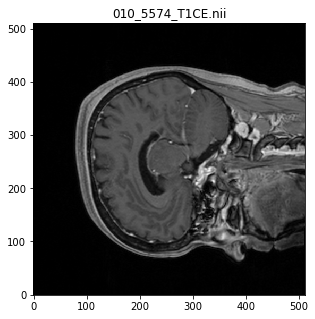

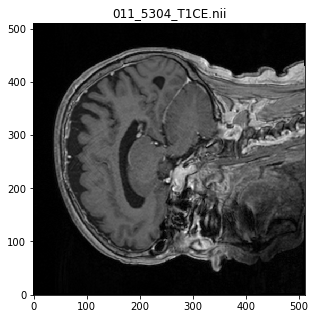

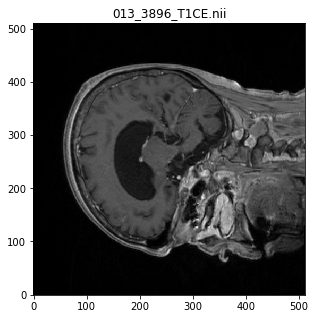

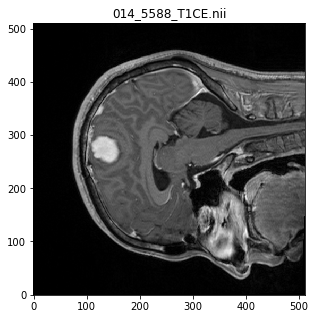

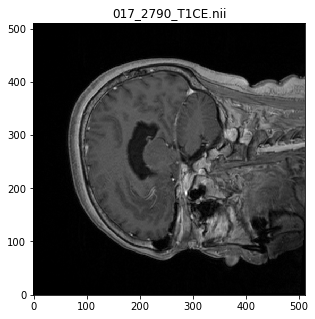

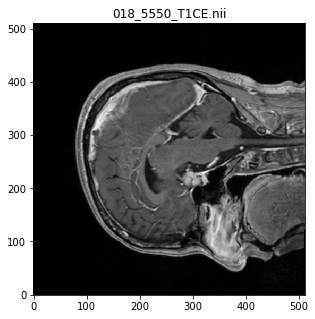

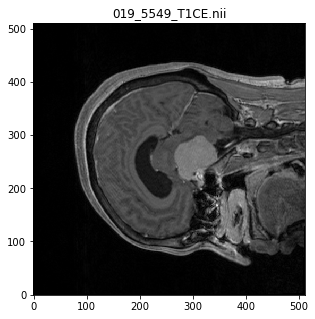

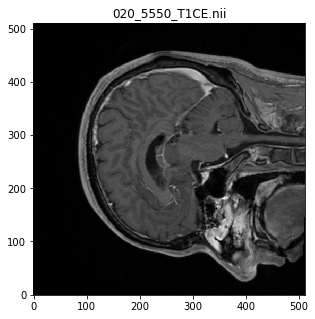

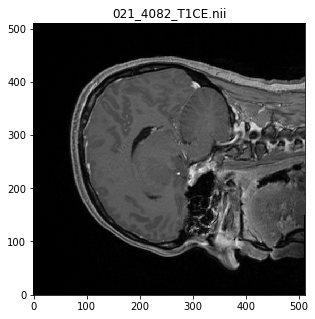

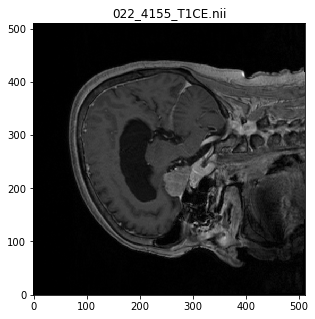

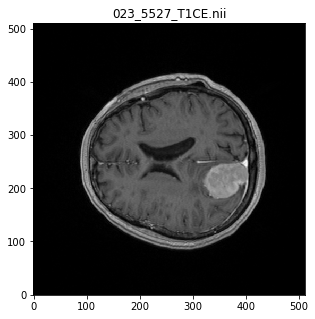

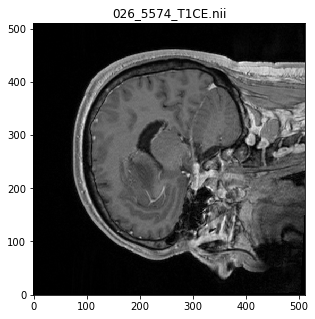

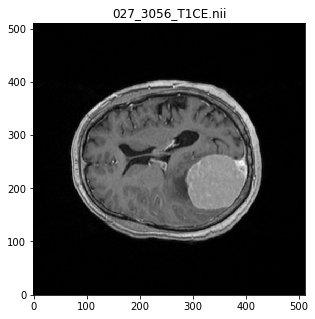

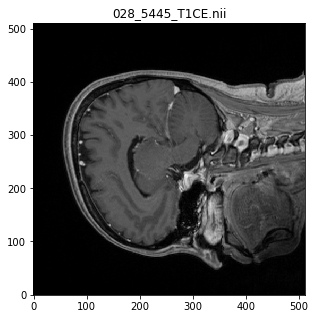

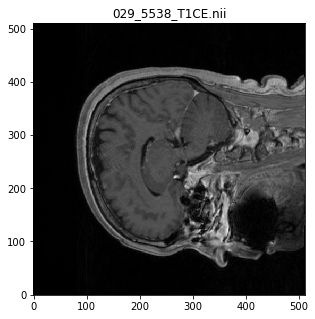

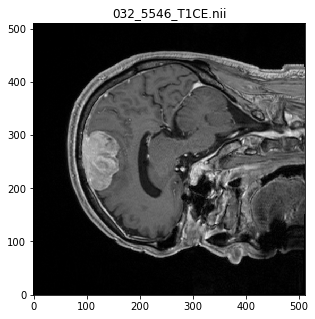

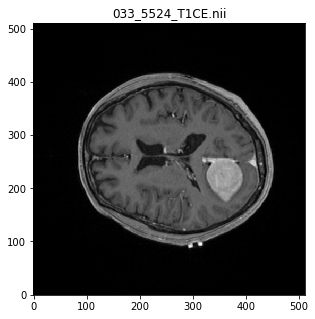

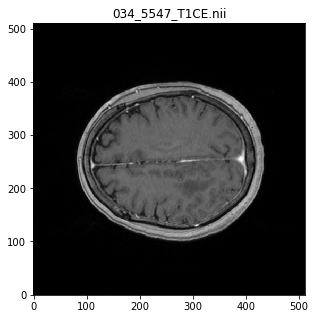

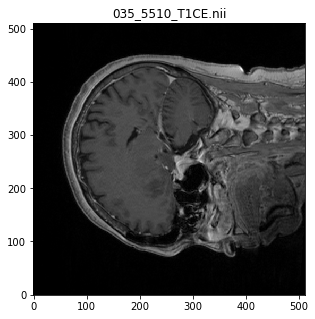

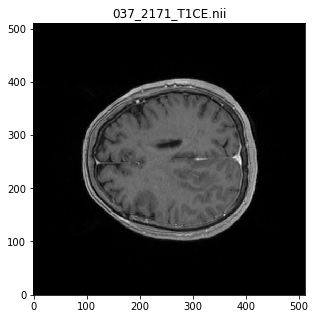

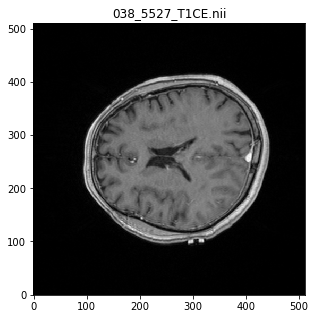

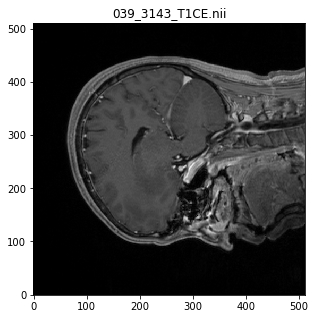

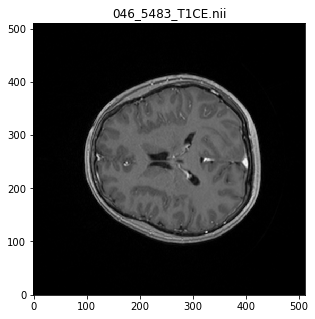

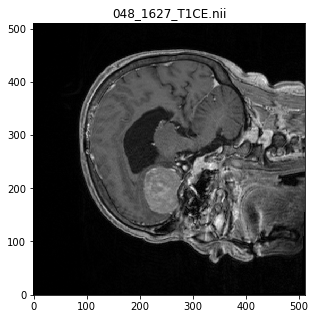

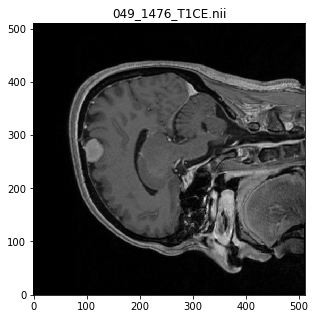

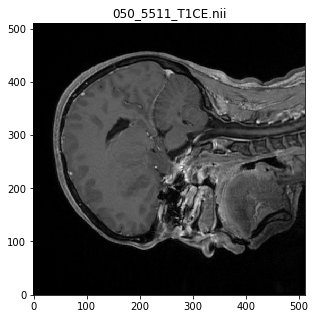

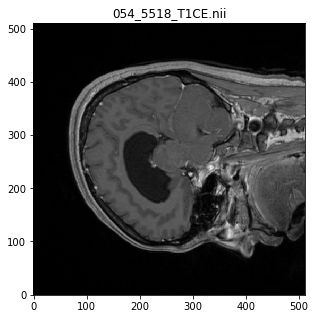

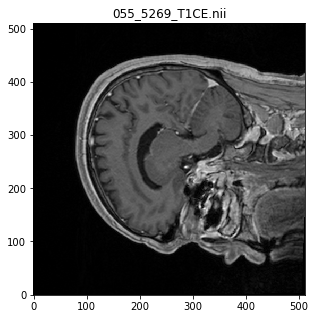

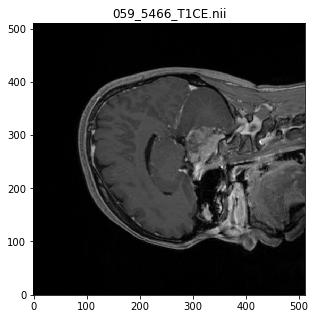

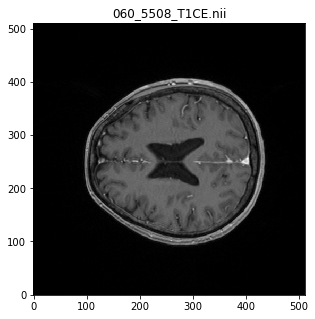

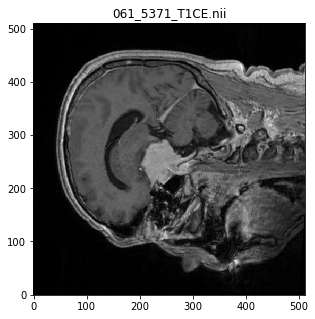

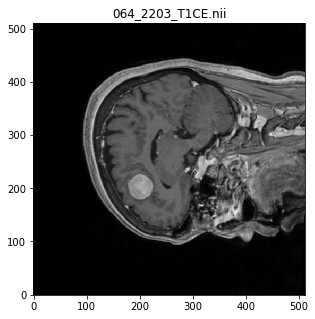

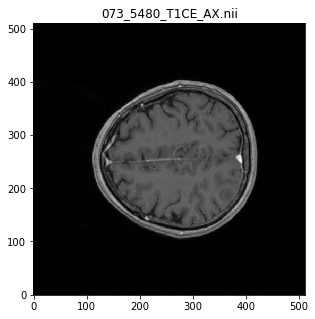

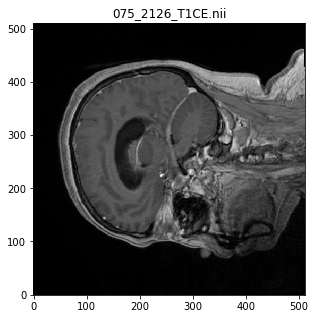

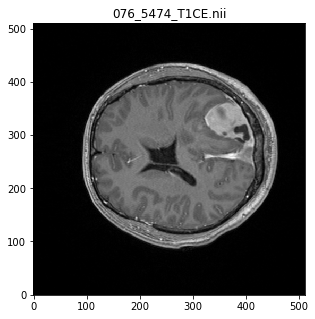

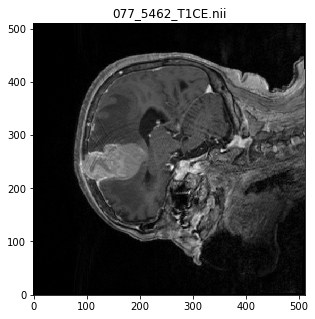

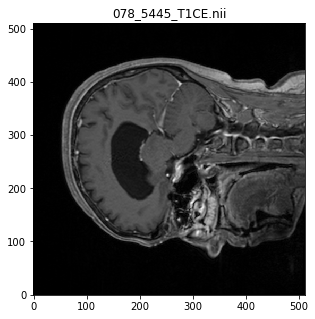

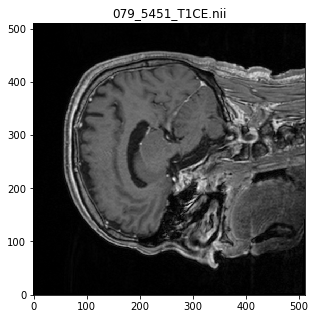

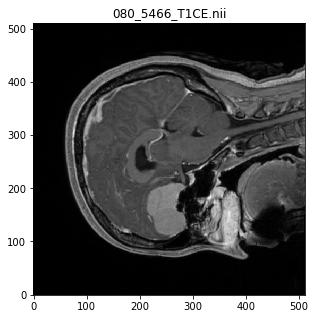

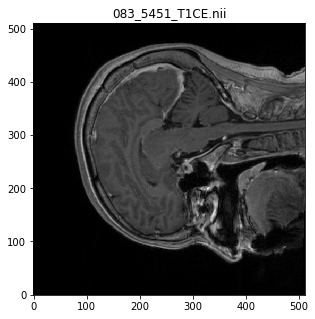

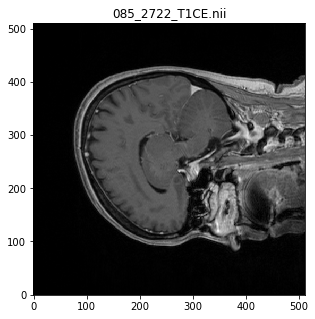

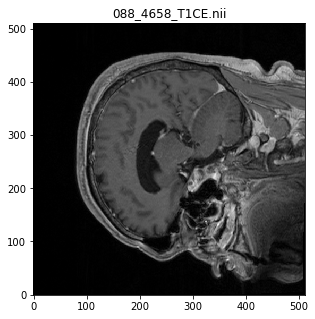

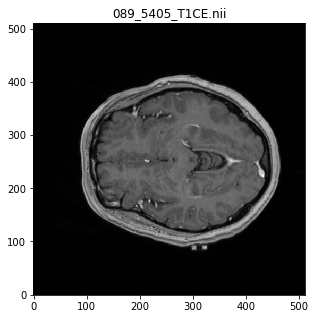

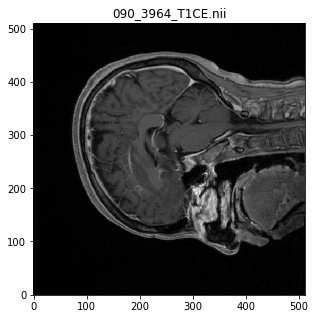

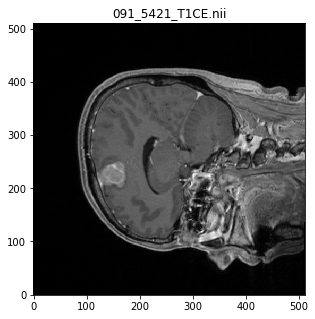

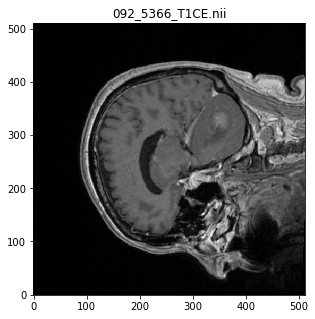

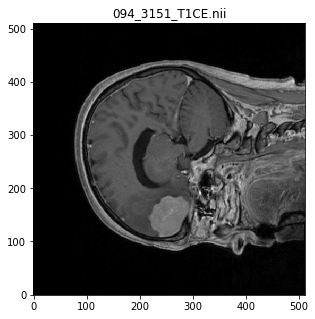

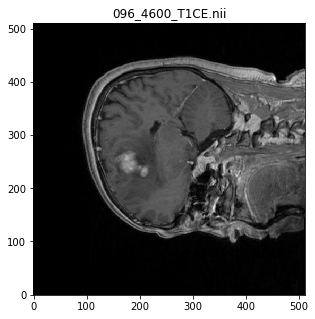

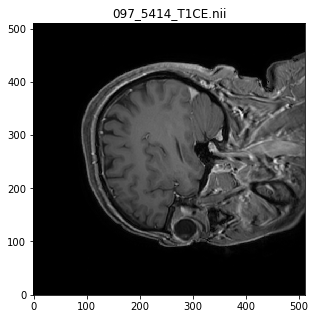

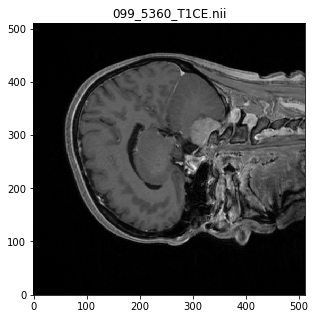

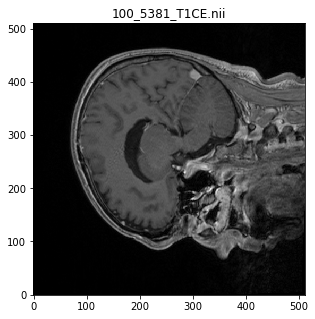

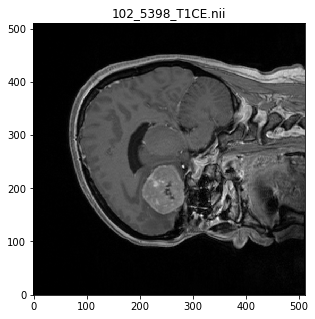

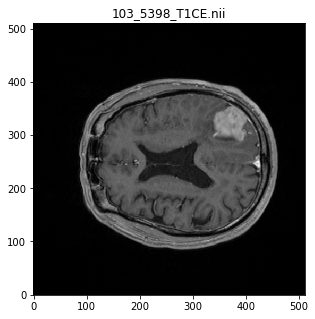

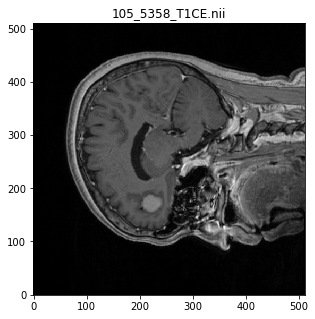

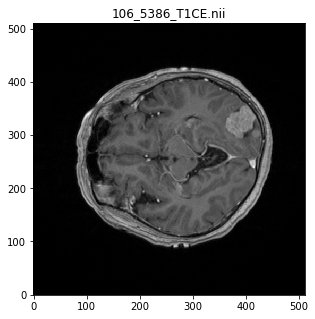

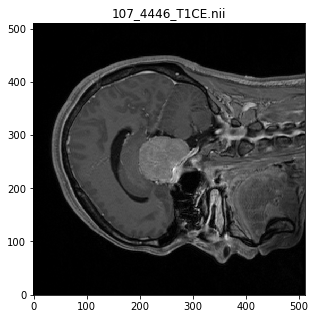

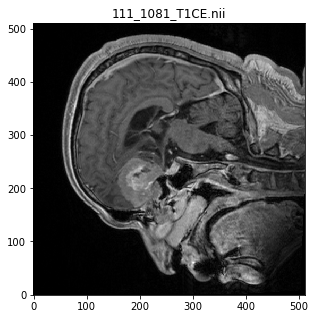

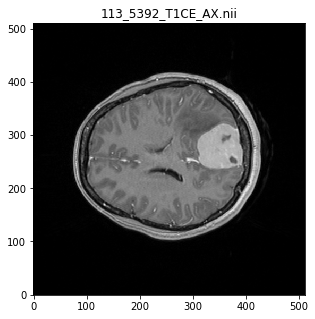

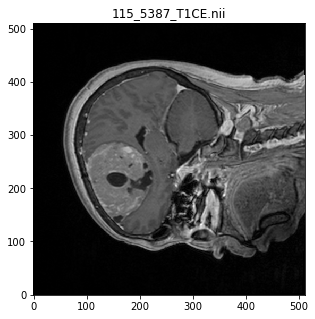

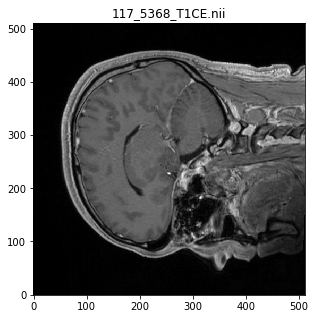

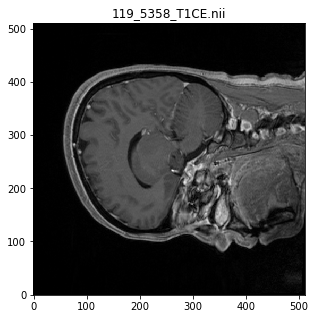

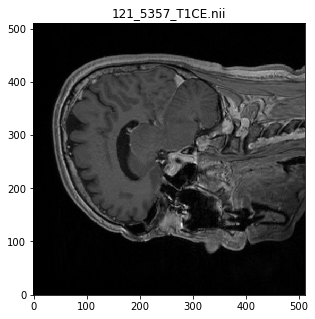

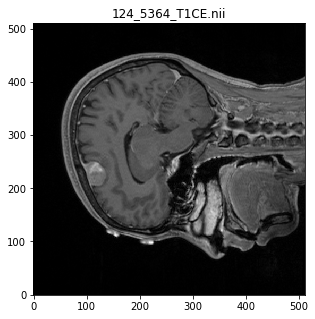

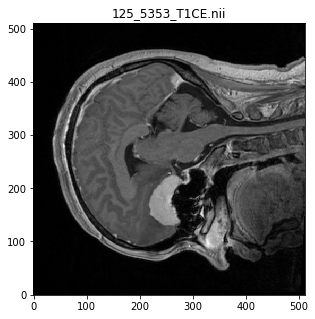

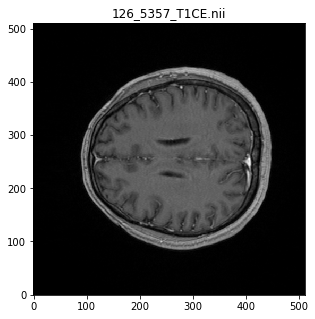

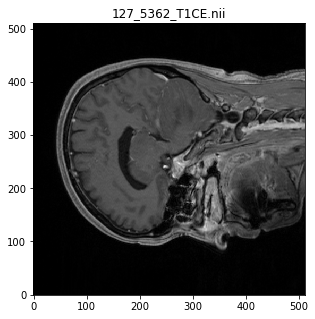

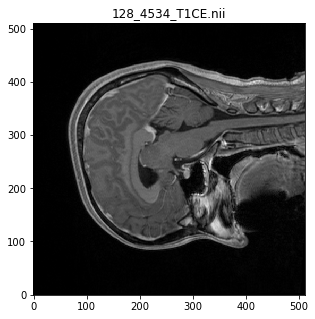

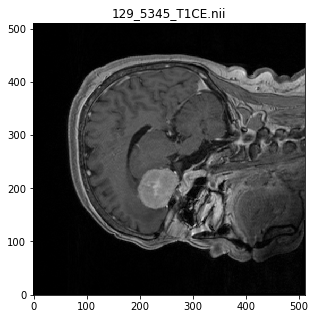

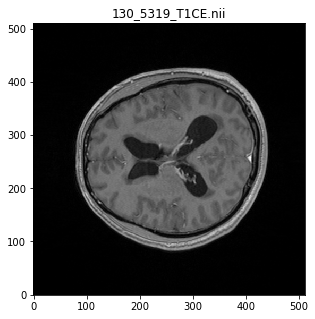

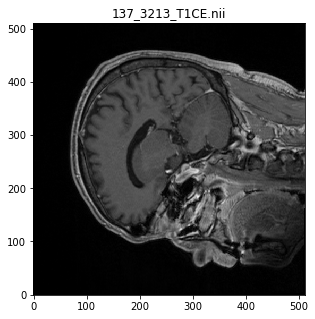

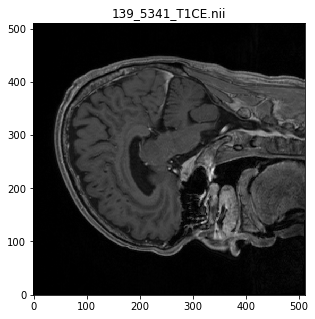

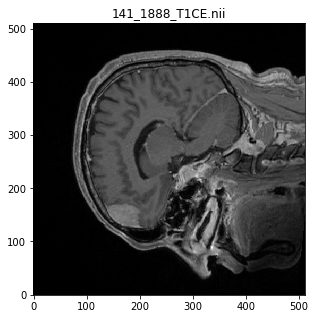

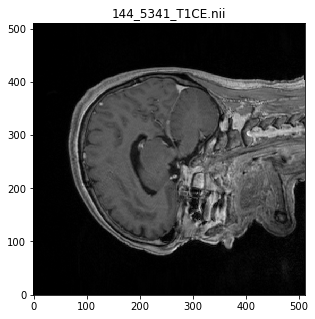

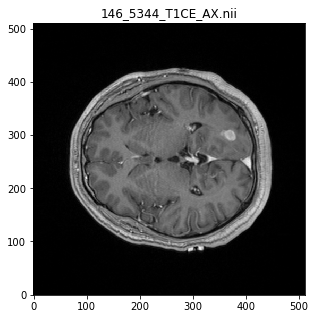

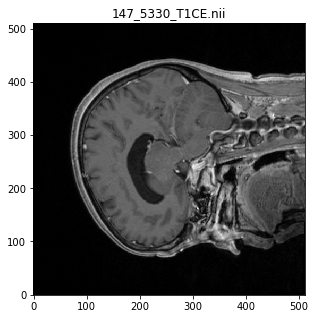

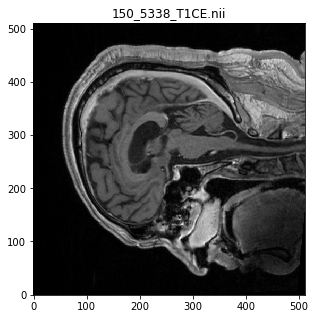

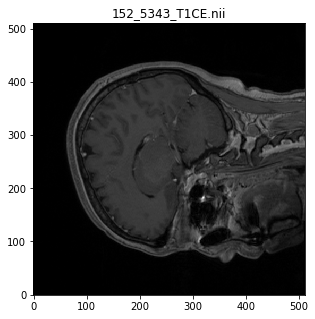

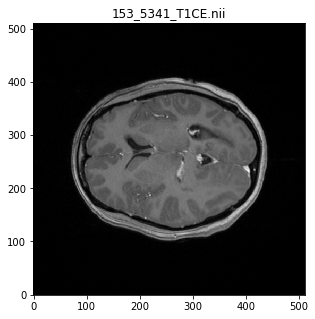

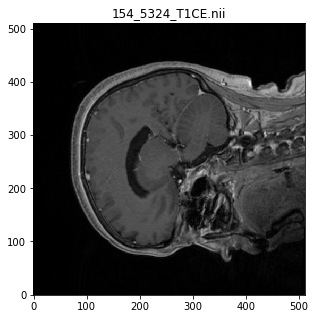

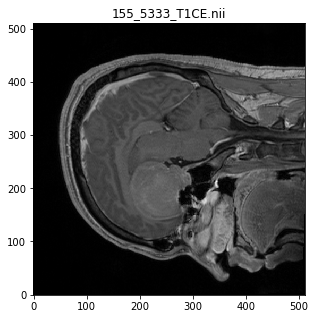

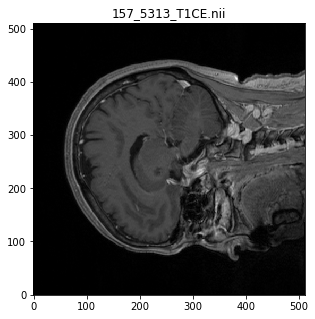

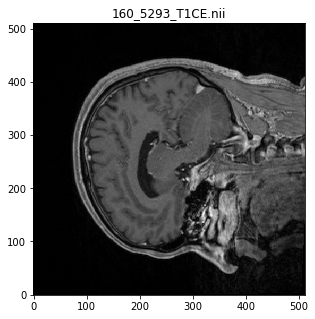

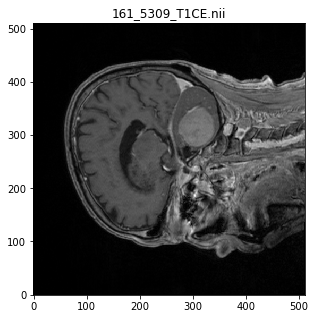

In [12]:
# Check file shape
srcpath = 'E:/20200603_Asan_meningioma_raw_nifti/Low_grade'
for (path, dirs, files) in os.walk(srcpath):
    for file in files:
        if "T1" in file:
            img = nib.load(os.path.join(path, file))
            img_data = img.get_fdata()
            fig, axes = plt.subplots(1, 1, figsize=(5, 5))
            plt.imshow(img_data[:, :, 50], cmap="gray", origin="lower")
            plt.title(file)
#            print(file, img_data.shape)

In [4]:
###### Transpose -> (Crop ->) Pad #######
for (path, dirs, files) in os.walk(srcpath):
    for file in files:
        if "T1CE" not in file:
            continue
        filepath = os.path.join(path, file)
        img = nib.load(filepath)
        img_data = img.get_fdata()
        print(filepath, img_data.shape)

        # transpose
        img_T = img_data.transpose(2, 0, 1)
        img_shape =img_T.shape 
        print(img_shape)

        # delete column with all zeroes
#        crop_width = int((img_T.shape[1] - 220) / 2)
#        cropped_img = img_T[:, crop_width:img_T.shape[1]-crop_width, :]
#        img_shape = cropped_img.shape
#        print(img_shape)

        # pad
        pad_val = int((img_shape[1] - img_shape[0]) / 2)
        padded_img = np.pad(img_T, ((pad_val, pad_val),(0,0),(0,0)), 'constant')
        print(padded_img.shape)


        # to save this 3D (ndarry) numpy use this
        ni_img = nib.Nifti1Image(padded_img, img.affine)
        outPath = os.path.join(path, file.split('.')[0] + '_AX.nii')
        nib.save(ni_img, outPath)


E:/20200603_Asan_meningioma_raw_nifti_preprocessed/High_grade/Resampled\001\001_T1CE.nii (256, 256, 176)
(176, 256, 256)
(256, 256, 256)
E:/20200603_Asan_meningioma_raw_nifti_preprocessed/High_grade/Resampled\002\002_T1CE.nii (256, 256, 176)
(176, 256, 256)
(256, 256, 256)
E:/20200603_Asan_meningioma_raw_nifti_preprocessed/High_grade/Resampled\003\003_T1CE.nii (256, 256, 176)
(176, 256, 256)
(256, 256, 256)
E:/20200603_Asan_meningioma_raw_nifti_preprocessed/High_grade/Resampled\004\004_T1CE.nii (256, 256, 176)
(176, 256, 256)
(256, 256, 256)
E:/20200603_Asan_meningioma_raw_nifti_preprocessed/High_grade/Resampled\005\005_T1CE.nii (256, 256, 176)
(176, 256, 256)
(256, 256, 256)
E:/20200603_Asan_meningioma_raw_nifti_preprocessed/High_grade/Resampled\006\006_T1CE.nii (256, 256, 176)
(176, 256, 256)
(256, 256, 256)
E:/20200603_Asan_meningioma_raw_nifti_preprocessed/High_grade/Resampled\007\007_T1CE.nii (256, 256, 176)
(176, 256, 256)
(256, 256, 256)
E:/20200603_Asan_meningioma_raw_nifti_pre

## 기타

In [31]:
# crop
filepath = "C:/Users/dain5/Desktop/001/001_T2.nii"
margin = 10
imge = nib.load(filepath)
img = imge.get_fdata()
new_height = 0
new_width = 0

# convert an image into an sqaure image if the dimensions of x and y are different
if img.shape[0] != img.shape[1]:
    if img.shape[0] < img.shape[1]:
        pad_width = int((img.shape[1] - img.shape[0])//2)
        img = np.pad(img, ((pad_width, pad_width), (0,0), (0,0)), constant_values=0)

    if img.shape[0] > img.shape[1]:
        pad_width = int((img.shape[0] - img.shape[1])//2)
        img = np.pad(img, ((0,0), (pad_width, pad_width), (0,0)), constant_values=0)

for z in range(img.shape[2]):
#    img[:, :, z] = img[np.ix_(mask.any(1),mask.any(0)), z]
    x_crop_img = img[~np.all(img[:, :, z] == 0, axis=1)]
    if new_height < x_crop_img.shape[0]:
        new_height = x_crop_img.shape[0]
    
    y_crop_img = img[~np.all(img[:, :, z] == 0, axis=0)]
    if new_width < y_crop_img.shape[1]:
        new_width = y_crop_img.shape[1]
    print(x_crop_img.shape)
print(new_height, new_width)

x_start, x_end = (img.shape[0]-new_height)//2, (img.shape[0]+new_height)//2
y_start, y_end = (img.shape[1]-new_width)//2, (img.shape[1]+new_width)//2
print(x_start, x_end, y_start, y_end)

new_img = img[y_start:y_end, x_start:x_end, :]

ni_img = nib.Nifti1Image(new_img, imge.affine)
nib.save(ni_img, "C:/Users/dain5/Desktop/001/001_T2_cropped.nii")


(472, 512, 20)
(471, 512, 20)
(470, 512, 20)
(469, 512, 20)
(469, 512, 20)
(468, 512, 20)
(467, 512, 20)
(467, 512, 20)
(467, 512, 20)
(467, 512, 20)
(467, 512, 20)
(469, 512, 20)
(469, 512, 20)
(469, 512, 20)
(471, 512, 20)
(472, 512, 20)
(472, 512, 20)
(472, 512, 20)
(472, 512, 20)
(464, 512, 20)
472 512
20 492 0 512


In [9]:
# crop
filepath = "C:/Users/dain5/Desktop/001/001_T2.nii"
margin = 10
imge = nib.load(filepath)
img = imge.get_fdata()

# convert an image into an sqaure image if the dimensions of x and y are different
if img.shape[0] != img.shape[1]:
    if img.shape[0] < img.shape[1]:
        pad_width = int((img.shape[1] - img.shape[0])//2)
        img = np.pad(img, ((pad_width, pad_width), (0,0), (0,0)), constant_values=0)

    if img.shape[0] > img.shape[1]:
        pad_width = int((img.shape[0] - img.shape[1])//2)
        img = np.pad(img, ((0,0), (pad_width, pad_width), (0,0)), constant_values=0)

# calculate the non-zero margins of x and y axes.
x_min, x_max = 1000, 0
y_min, y_max = 1000, 0

for z in range(img.shape[2]):
    for row in range(img.shape[0]):
        x = np.nonzero(img[row, :, z])
        if x[0].size == 0:
            continue

        if x_min > x[0].min():
            x_min = x[0].min()
        if x_max < x[0].max():
            x_max = x[0].max()

    for col in range(img.shape[1]):
        y = np.nonzero(img[:, col, z])

        if y[0].size == 0:
            continue

        if y_min > y[0].min():
            y_min = y[0].min()
        if y_max < y[0].max():
            y_max = y[0].max()
x_width = x_max - x_min
x_center = x_min + (x_width//2)
y_width = y_max - y_min
y_center = y_min + (y_width//2)

if x_width >= y_width:
    new_width = x_width + margin
else: 
    new_width = y_width + margin

x_start, x_end = x_center-(new_width//2), x_center+(new_width//2)
y_start, y_end = y_center-(new_width//2), y_center+(new_width//2)
print(x_start, x_end, y_start, y_end)

new_img = img[0:y_end, 0:x_end, :]

print(new_img.shape)

ni_img = nib.Nifti1Image(new_img, imge.affine)
nib.save(ni_img, "C:/Users/dain5/Desktop/001/001_T2_cropped.nii")


-5 515 -5 515
(512, 512, 20)


In [20]:
# Resampling
filePath = '/media/scmlsg/Chansik/20200603_Asan_meningioma_raw_nifti_preprocessed/sample_001/001_T1CE_AX_resampled_resampled_by_size.nii'
outPath = '/media/scmlsg/Chansik/20200603_Asan_meningioma_raw_nifti_preprocessed/sample_001/001_T1CE_AX_resampled_resampled_by_size_resampled.nii'

print("Resampling: filename {}".format(filePath.split(os.path.sep)[-1]))
#!ResampleImage 3 {filePath} {outPath} 220X220X176 1
!ResampleImage 3 {filePath} {outPath} 1X1X1

Resampling: filename 001_T1CE_AX_resampled_resampled_by_size.nii


In [27]:
total = 0
for (path, dirs, files) in os.walk(srcpath):
    for file in files:
        if total > 10:
            break
        total += 1
        t1ce_path = glob(os.path.join(path, '*T1CE.nii'))
        if t1ce_path == []:
            print('Cannot find T1CE')
#            continue
        filepath = os.path.join(path, file)
        img = nib.load(filepath)
        img_data = img.get_fdata()
        print(file, img_data.shape)
        
        img_data = img_data.transpose(2, 0, 1)
#        print(img_data.shape)

        # to save this 3D (ndarry) numpy use this
#        ni_img = nib.Nifti1Image(img_data, img.affine)
#        outPath = os.path.join(path, file.split('.')[0] + '_AX.nii')
#        nib.save(ni_img, outPath)

        

001_T1CE.nii (256, 256, 176)
001_T1CE_AX_not_zoomed.nii (176, 256, 256)
001_T1CE_AX_not_zoomed_resampled.nii (220, 220, 220)
001_T1CE_resampled.nii (220, 220, 220)
001_T2.nii (210, 210, 150)
002_T1CE.nii (256, 256, 176)
002_T2.nii (197, 220, 138)
003_T1CE.nii (256, 256, 176)
003_T2.nii (230, 230, 150)
004_T1CE.nii (256, 256, 176)
004_T2.nii (180, 240, 146)


In [14]:
# zoom
filepath ='/media/scmlsg/Chansik/20200603_Asan_meningioma_raw_nifti_preprocessed/sample_001/001_T1CE_resampled.nii'

img = nib.load(filepath)
img_data = img.get_fdata()
print(img_data.shape)

img_data = img_data.transpose(2, 0, 1)
print(img_data.shape)

zoom_scale = int(img_data.shape[1] / img_data.shape[0])
img_data = zoom(img_data, (256/176, 1, 1))
print(img_data.shape)

# to save this 3D (ndarry) numpy use this
ni_img = nib.Nifti1Image(img_data, img.affine)
print(ni_img.header.get_zooms())

nib.save(ni_img, 
         '/media/scmlsg/Chansik/20200603_Asan_meningioma_raw_nifti_preprocessed/sample_001/001_T1CE_AX_resampled_zoomed.nii')


#for i in range(img.shape[1]):
#    sliced = img_data[:,i,:]
#    slice_lst.append(sliced)

#show_slices(slice_lst[130:133])
#plt.suptitle("Slices for anatomical image")  

(256, 256, 176)
(176, 256, 256)
(256, 256, 256)
(1.0, 1.0, 1.0)


In [14]:
# Dicom Image
"""usage: reslice.py <glob>
where <glob> refers to a set of DICOM image files.

Example: python reslice.py "*.dcm". The quotes are needed to protect the glob
from your system and leave it for the script."""

import pydicom
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import os

in_path = "C:/Users/dain5/Downloads/DICOM/ST000000/SE000001"
# load the DICOM files
#for (path, dirs, files) in os.walk(in_path):
#    for file in files:
#        if "T1C" not in file:
#            continue


skipped, no SliceLocation: 0


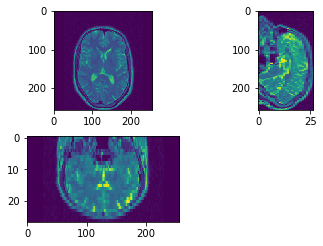

In [16]:
files=[]
for fname in glob(os.path.join(in_path, '*')):
    files.append(pydicom.read_file(fname))

# skip files with no SliceLocation (eg scout views)
slices=[]
skipcount=0
for f in files:
    if hasattr(f, 'SliceLocation'):
        slices.append(f)
    else:
        skipcount = skipcount + 1

print("skipped, no SliceLocation: {}".format(skipcount))

# ensure they are in the correct order
slices = sorted(slices, key=lambda s: s.SliceLocation)

# pixel aspects, assuming all slices are the same
ps = slices[0].PixelSpacing
ss = slices[0].SliceThickness
ax_aspect = ps[1]/ps[0]
sag_aspect = ps[1]/ss
cor_aspect = ss/ps[0]

# create 3D array
img_shape = list(slices[0].pixel_array.shape)
img_shape.append(len(slices))
img3d=np.zeros(img_shape)

# fill 3D array with the images from the files
for i, s in enumerate(slices):
    img2d = s.pixel_array
    img3d[:,:,i] = img2d

# plot 3 orthogonal slices
a1 = plt.subplot(2,2,1)
plt.imshow(img3d[:,:,img_shape[2]//2])
a1.set_aspect(ax_aspect)

a2 = plt.subplot(2,2,2)
plt.imshow(img3d[:,img_shape[1]//2,:])
a2.set_aspect(sag_aspect)

a3 = plt.subplot(2,2,3)
plt.imshow(img3d[img_shape[0]//2,:,:].T)
a3.set_aspect(cor_aspect)

plt.show()